## Bike Usage Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Essentially, the company wants to know -
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands 

## Step 1: Reading and Understanding the Data

importing necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
bikeusage = pd.read_csv('day.csv')

In [3]:
bikeusage.shape

(730, 16)

In [4]:
bikeusage.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikeusage.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


### Data Sanity Check
We will check data for missing values,invalid values, for datatypes and column names.
#### Checking for null/missing values

In [6]:
#checking various aspects of the dataframe
bikeusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- There are no null values in the data.
-  No need to fix data type for `dteday`, It has object datatype but we will be dropping that column.



#### Droping the irrelevant columns

Reasons -

 1. instant - it's just an index, we have no use of this column.
 2. dteday - month and year is already provided to us. This is providing us the same information.
 3. atemp - It is very similar to temp, where as atemp is quite subjective.It has high multicollinearity to temp. Let's reconfirm that.
 4. casual & registered - cnt column is total of these two columns. 


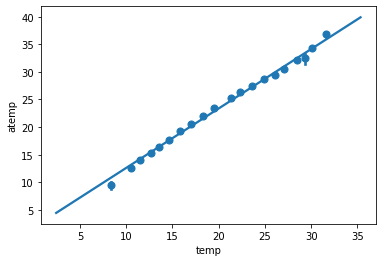

In [7]:
sns.regplot(x="temp", y="atemp", data=bikeusage, x_estimator=np.mean, x_bins = 20)
plt.show()

- temp and atemp is highly correalted. Both the columns/feautures are providing us the same information. We can drop one of the column.

In [8]:
#dropping these five columns
bikeusage.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'], axis = 1,inplace = True)

In [9]:
#renaming column names for better readibility
bikeusage.rename(columns = { 'yr':'year', 'mnth': 'month', 'weathersit' :'weather', 'cnt' : 'count'}, inplace = True)

#### Invalild Value Check
- As per our data dictionary Min-Max values for following columns are
    
    1. season 1-4
    
    2. year 0,1
    
    3. mnth 1-12

    4. holiday 0,1
    
    5. weekday 1-7
    
    6. workingday 0,1
    
    7. weathersit 1-4

In [10]:
bikeusage.describe()

,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


- All data is between given range, However some categorical data has label encoding instead of dummy variables. We will fix this in data preparation.


- Except `Weather`, In data value 4 is missing which represet **Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**. It is possible that this weather condition was not there in two years of span.


- From the max values and 75th percentile values, we can see that other than `windspeed` no other variable is extremely far. We can assume that there are no outliers in this dataset. Let's confirm.


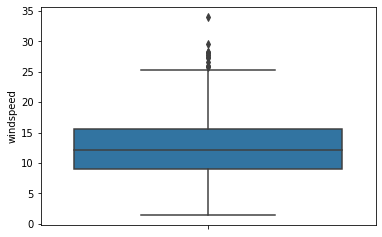

In [11]:
#checking for outliers for windspeed

sns.boxplot(y='windspeed', data=bikeusage)
plt.show()

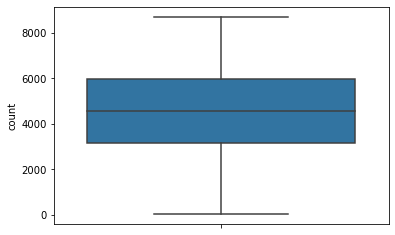

In [12]:
#checking for outliers for count

sns.boxplot(y='count', data=bikeusage)
plt.show()

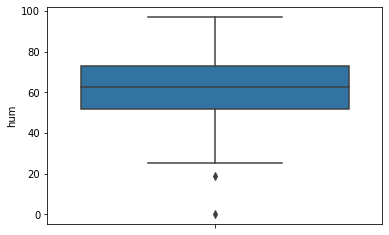

In [13]:
#checking for outliers for humidity

sns.boxplot(y='hum', data=bikeusage)
plt.show()

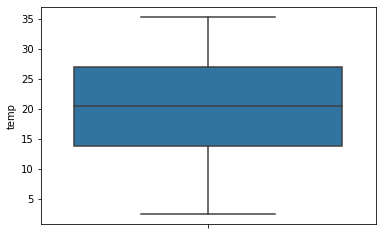

In [14]:
#checking for outliers for temp

sns.boxplot(y='temp', data=bikeusage)
plt.show()

- There are no outliers in any of the four continuous numerical variables.

### Checking/ Fixing vaiable type:

based on data dictionary;

**1.Binary Variables** are `year`, `holiday` and `workingday`

**2.Categorical Varibales** are `season`, `weekday`, `month` and `weather`
- these four variables have *Label encoding*, we need to convert these categoricacl for data visualization and then to dummy variables for Linear Regression.

**3.Numerical Variables** are `temp`, `hum`, `windspeed` and `count`

### Converting Label Encoded variables to Categorical Variables


In [15]:
bikeusage.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)

bikeusage.weather.replace({1:'clear',2:'mist',3:'light rain',4:'heavy rain'}, inplace=True)

bikeusage.month.replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'}, inplace=True)

bikeusage.weekday.replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}, inplace=True)


In [16]:
bikeusage.head()

,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,count
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


## Step 2: Visualising the Data

Let's visualizatize the data

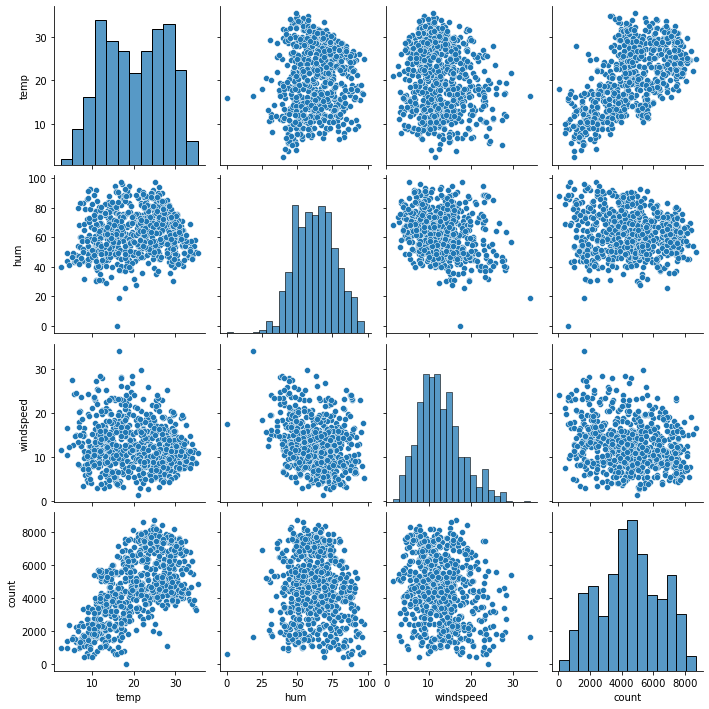

In [17]:
num_cols = bikeusage[['temp','hum','windspeed','count']].copy()
sns.pairplot(num_cols)
plt.show()

- `Count` and `temp` has the highest corelation among all.

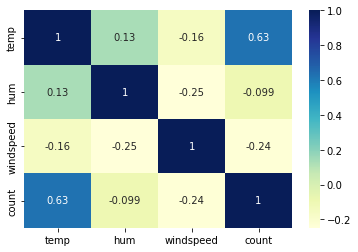

In [18]:
bu_corr=num_cols.corr()
sns.heatmap(bu_corr, cmap="YlGnBu", annot = True)
plt.show()

- Heatmap is confiming our finding.

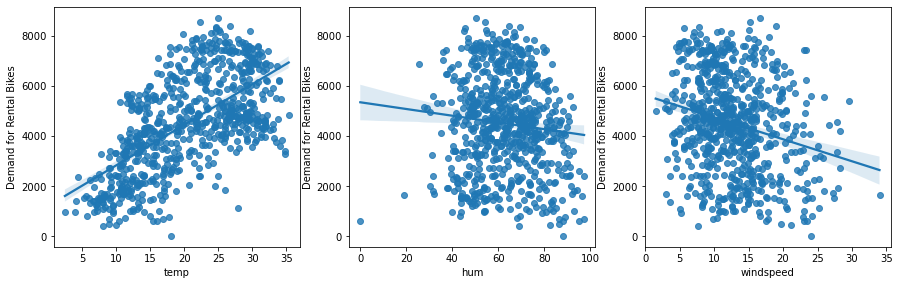

In [19]:
num_cols1 = num_cols.drop(['count'], axis = 1)
plt.figure(figsize=(15, 15))
for i in enumerate(num_cols1):
    plt.subplot(3,3,i[0]+1)
    sns.regplot(x=i[1], y="count", data= num_cols)
    plt.ylabel("Demand for Rental Bikes")
plt.show()

- tempature has linear realtionship with demand for rental bikes.
- whereas humidity and windspeed has somewhat negative effect on demand for rental bikes. Let's study that while making a model.

#### Visualising Categorical Variables
Let's visualizatize the categorical data we just created.

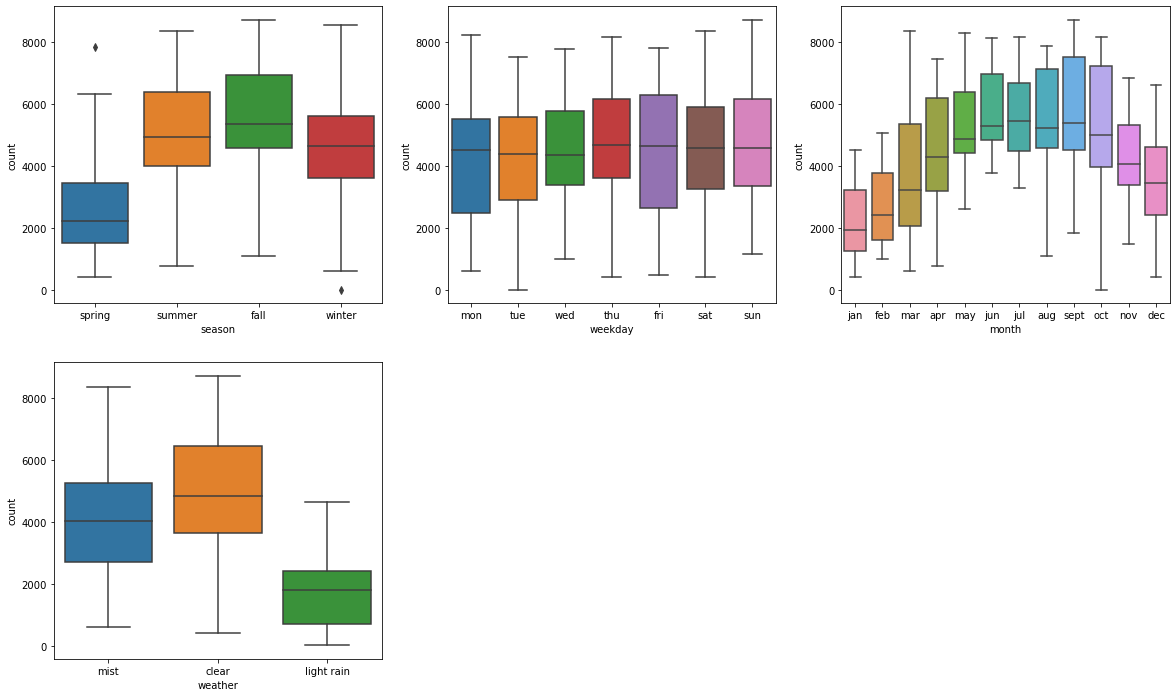

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bikeusage)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'count', data = bikeusage)
plt.subplot(2,3,3)
sns.boxplot(x = 'month', y = 'count', data = bikeusage)
plt.subplot(2,3,4)
sns.boxplot(x = 'weather', y = 'count', data = bikeusage)

plt.show()

#### Findings
1. Fall season has much greater demand for rental bike compared to other seasons. Summer is second closet.
2. Weekday does not seem to have any significant impact on demand for rental bikes.
3. May-September has significantly higher demand for rental bikes.
4. Clear and misty weather conditions results in higher demand for rental bikes. Whereas rains have negative effect on the same.

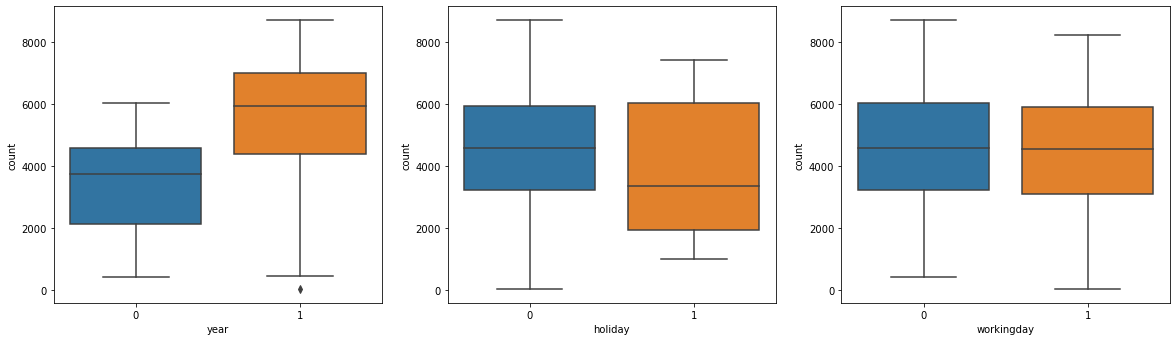

In [21]:
# Let's also plot binary variables and see the patterns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'year', y = 'count', data = bikeusage)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'count', data = bikeusage)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'count', data = bikeusage)

plt.show()

#### Findings
1. Year 2019 has much higher demand for rental bike than 2018. So there is clear growth.
2. Demand for rental bike does not change much based on holiday. However, Majority of the poplution demanding for bike when there is no holiday.
3. Workday has no significant impact on rental bike demand.

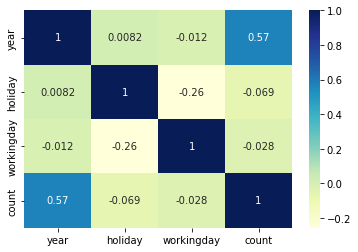

In [22]:
#Binary variables correaltion
bin_cols = bikeusage[['year','holiday', 'workingday', 'count']].copy()
bu_corr1=bin_cols.corr()
sns.heatmap(bu_corr1, cmap="YlGnBu", annot = True)
plt.show()

- Heatmap confirms some of our findings.

## Step 3: Data Preparation
- Let's convert the categorical veriables to dummy variables.


In [23]:
bikeusage = pd.get_dummies(data=bikeusage,columns=['season','month','weekday','weather'],drop_first=True)

- We used `drop_first=True` because just like boolean value. there are only limited number of outcome is possible. 
    e.g - Suppose Sky has only three descriptions; clear, cloudy and raining. If sky is not cloudy neither raining. Then it has
    to be Clear. With this logic, we don't need to know if it is clear or not. because it either one of those three.

In [24]:
#let's check the all column names
list(bikeusage.columns)

['year',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'count',
 'season_spring',
 'season_summer',
 'season_winter',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sept',
 'weekday_mon',
 'weekday_sat',
 'weekday_sun',
 'weekday_thu',
 'weekday_tue',
 'weekday_wed',
 'weather_light rain',
 'weather_mist']

## Step 4: Splitting the Data into Training and Testing Sets

Let's split the data so we can test our model. 

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows
np.random.seed(0)
bu_train, bu_test = train_test_split(bikeusage, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

To handle the outliers, We will scale of features using MinMax Scaling.

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
Scaler = MinMaxScaler()

In [28]:
#treating outliers in all continuous numerical variable
num_vars = ['temp','hum','windspeed','count']

bu_train[num_vars] = Scaler.fit_transform(bu_train[num_vars])

In [29]:
#Let's check the train data
print(bu_train.shape)
bu_train.head()

(510, 29)


,year,holiday,workingday,temp,hum,windspeed,count,season_spring,season_summer,season_winter,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_light rain,weather_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
#Let's check the test data
print(bu_test.shape)
bu_test.head()

(219, 29)


,year,holiday,workingday,temp,hum,windspeed,count,season_spring,season_summer,season_winter,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_light rain,weather_mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


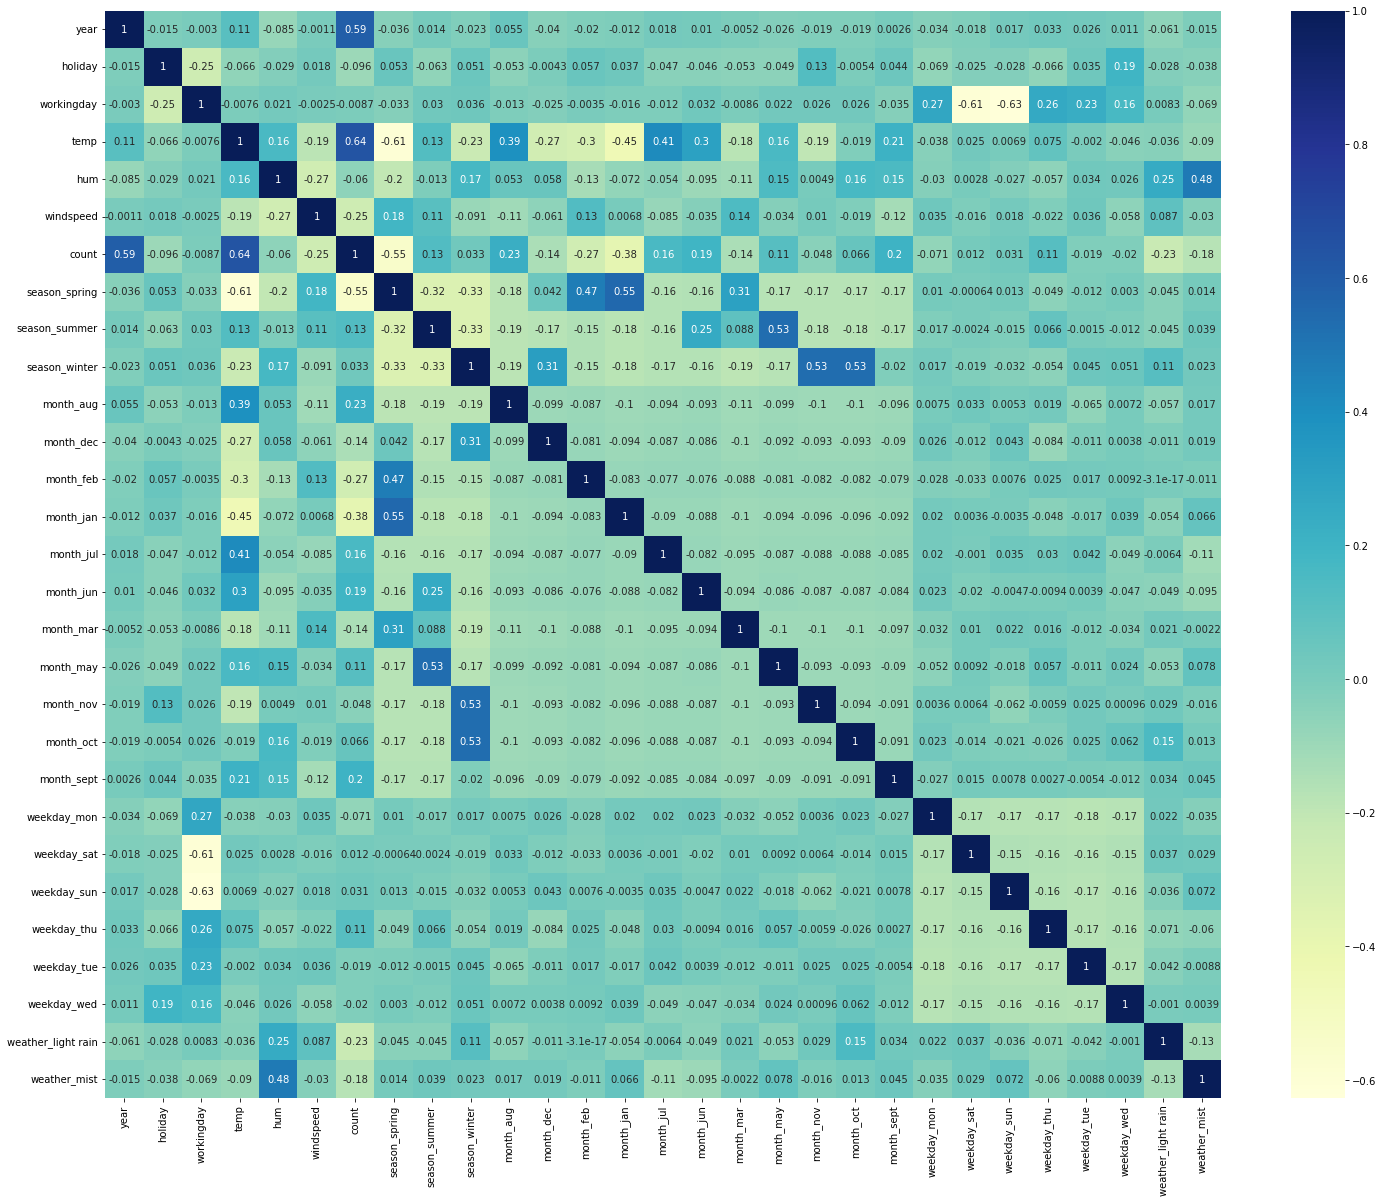

In [31]:
#Checkcing all the features for correaltion
plt.figure(figsize = (25, 20))
sns.heatmap(bu_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

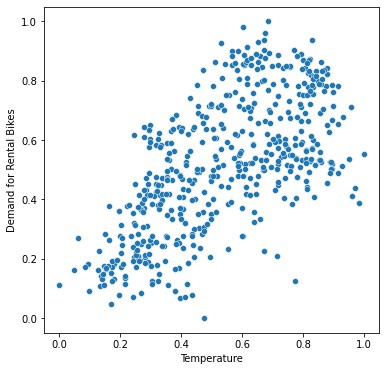

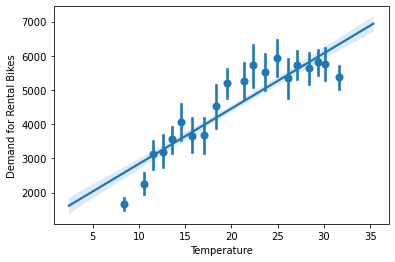

In [32]:
#temp seems to have really high correaltion, Let's plot it against target variable
plt.figure(figsize=[6,6])
plt.ylabel("Demand for Rental Bikes")
plt.xlabel("Temperature")
sns.scatterplot(data=bu_train, x="temp", y="count")
plt.show()

sns.regplot(x="temp", y="count", data=bikeusage, x_estimator=np.mean, x_bins = 20)
plt.ylabel("Demand for Rental Bikes")
plt.xlabel("Temperature")
plt.show()

- Temperature continues to be highly correlated with demand for rental bikes.

## Step 5: Building a linear model

### Dividing into X and Y sets for the model building

In [33]:
#Removing the target variable from the train dataset.

y_train = bu_train.pop('count')
X_train = bu_train

### Recursive feature elimination (RFE)
Using RFE, lets cut down to best possible features.

In [34]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [35]:
# Building a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm,n_features_to_select = 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

- 15 features are much more managable than 29

In [37]:
#Let's check all the columns selected by RFE
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_dec', 'month_jan', 'month_jul',
       'month_nov', 'month_sept', 'weather_light rain', 'weather_mist'],
      dtype='object')

In [38]:
#Let's save those columns sepreately for futher optimization

rfe_X_train = X_train[['year', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_dec', 'month_jan', 'month_jul',
       'month_nov', 'month_sept', 'weather_light rain', 'weather_mist']]

### Manually Dropping features/Optimizing Model
RFE have given us 15 features. Lets optimize the model even further.


In [39]:
#importing statsmodel
import statsmodels.api as sm

In [40]:
#making Ordinary least squares model for chosen rfe features

X_train_sm = sm.add_constant(rfe_X_train)
lr_1 = sm.OLS(y_train, X_train_sm).fit()
lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.34e-189
Time:                        23:16:30   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3202      0.036      8.886      0.000       0.249       0.391
year                   0.2303      0.008     28.511      0.000       0.214       0.246
holiday               -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                   0.4800      0.037     12.977      0.000       0.407       0.553
hum                   -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed             -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring         -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer          0.0408      0.015      2.659      0.008       0.011       0.071
season_winter          0.1034      0.018      5.763      0.000       0.068       0.139
month_dec             -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_jan             -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_jul             -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_nov             -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_sept             0.0749      0.017      4.438      0.000       0.042       0.108
weather_light rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weather_mist          -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 - All the P values seems be in range. which is less than 0.05

In [41]:
# importing VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = rfe_X_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_X_train.values, i) for i in range(rfe_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weather_mist,2.32
0,year,2.09
11,month_nov,1.83
9,month_jan,1.75


 - VIF for `hum`, `temp` is too high.

In [42]:
# Let's drop 'hum' because it has highest VIF
rfe_X_train = rfe_X_train.drop('hum',1)

In [43]:
# Let's Check the model now.
X_train_sm = sm.add_constant(rfe_X_train)
lr_2 = sm.OLS(y_train, X_train_sm).fit()
lr_2.params
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.57e-186
Time:                        23:16:31   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2466      0.032      7.679      0.000       0.184       0.310
year                   0.2343      0.008     28.709      0.000       0.218       0.250
holiday               -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                   0.4377      0.036     12.083      0.000       0.366       0.509
windspeed             -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring         -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer          0.0333      0.015      2.148      0.032       0.003       0.064
season_winter          0.0887      0.018      4.951      0.000       0.053       0.124
month_dec             -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_jan             -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_jul             -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_nov             -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_sept             0.0682      0.017      3.992      0.000       0.035       0.102
weather_light rain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weather_mist          -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = rfe_X_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_X_train.values, i) for i in range(rfe_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,year,2.07
10,month_nov,1.80
8,month_jan,1.66
9,month_jul,1.59
13,weather_mist,1.56


- Our R Scored have gone down slightly however VIF for temp gone down significantly too. It is still over 5. 
- We tried dropping `temp` but it reduces the R score to ~0.55. which is significant. So let's try dropping the next feature in the list.

In [45]:
# Let's drop 'windspeed'
rfe_X_train=rfe_X_train.drop('windspeed',1)

In [46]:
X_train_sm = sm.add_constant(rfe_X_train)
lr_3 = sm.OLS(y_train, X_train_sm).fit()
lr_3.params
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.92e-179
Time:                        23:16:31   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -944.0
Df Residuals:                     496   BIC:                            -884.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1853      0.032      5.832      0.000       0.123       0.248
year                   0.2330      0.008     27.513      0.000       0.216       0.250
holiday               -0.0942      0.027     -3.489      0.001      -0.147      -0.041
temp                   0.4614      0.037     12.337      0.000       0.388       0.535
season_spring         -0.0834      0.022     -3.756      0.000      -0.127      -0.040
season_summer          0.0250      0.016      1.561      0.119      -0.006       0.057
season_winter          0.0920      0.019      4.949      0.000       0.055       0.128
month_dec             -0.0349      0.018     -1.910      0.057      -0.071       0.001
month_jan             -0.0336      0.019     -1.781      0.076      -0.071       0.003
month_jul             -0.0515      0.019     -2.683      0.008      -0.089      -0.014
month_nov             -0.0439      0.020     -2.220      0.027      -0.083      -0.005
month_sept             0.0734      0.018      4.145      0.000       0.039       0.108
weather_light rain    -0.3071      0.025    -12.079      0.000      -0.357      -0.257
weather_mist          -0.0800      0.009     -8.860      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       77.233   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.024
Skew:                          -0.742   Prob(JB):                     1.50e-46
Kurtosis:                       5.780   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['Features'] = rfe_X_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_X_train.values, i) for i in range(rfe_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.30
5,season_winter,2.79
3,season_spring,2.12
0,year,2.07
4,season_summer,1.93
9,month_nov,1.78
7,month_jan,1.65
8,month_jul,1.59
12,weather_mist,1.56
6,month_dec,1.46


- R Score had slight imporvement.
- temp VIF is within 5 which is good.
- However, P value for `season_summer` quite high. Let's drop this.

In [48]:
# Let's drop 'season_summer'
rfe_X_train=rfe_X_train.drop('season_summer',1)

In [49]:
X_train_sm = sm.add_constant(rfe_X_train)
lr_4 = sm.OLS(y_train, X_train_sm).fit()
lr_4.params
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.48e-180
Time:                        23:16:31   Log-Likelihood:                 484.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     497   BIC:                            -888.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2190      0.023      9.374      0.000       0.173       0.265
year                   0.2334      0.008     27.535      0.000       0.217       0.250
holiday               -0.0937      0.027     -3.465      0.001      -0.147      -0.041
temp                   0.4343      0.033     13.089      0.000       0.369       0.499
season_spring         -0.1072      0.016     -6.624      0.000      -0.139      -0.075
season_winter          0.0740      0.015      5.068      0.000       0.045       0.103
month_dec             -0.0400      0.018     -2.222      0.027      -0.075      -0.005
month_jan             -0.0380      0.019     -2.035      0.042      -0.075      -0.001
month_jul             -0.0620      0.018     -3.450      0.001      -0.097      -0.027
month_nov             -0.0491      0.020     -2.518      0.012      -0.087      -0.011
month_sept             0.0623      0.016      3.836      0.000       0.030       0.094
weather_light rain    -0.3083      0.025    -12.114      0.000      -0.358      -0.258
weather_mist          -0.0798      0.009     -8.830      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       78.587   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.903
Skew:                          -0.741   Prob(JB):                     2.40e-49
Kurtosis:                       5.888   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = rfe_X_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_X_train.values, i) for i in range(rfe_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.04
4,season_winter,2.51
0,year,2.05
3,season_spring,1.93
8,month_nov,1.78
6,month_jan,1.65
11,weather_mist,1.52
5,month_dec,1.46
7,month_jul,1.34
9,month_sept,1.20


- R Score had slight decreased.
- temp VIF close to 3 which is good.
- P value for `month_jan` is releatively high. Let's see removing that has any effect on model.

In [51]:
# Let's drop 'month_jan'
rfe_X_train=rfe_X_train.drop('month_jan',1)

In [52]:
X_train_sm = sm.add_constant(rfe_X_train)
lr_5 = sm.OLS(y_train, X_train_sm).fit()
lr_5.params
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.34e-180
Time:                        23:16:31   Log-Likelihood:                 482.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     498   BIC:                            -890.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2075      0.023      9.125      0.000       0.163       0.252
year                   0.2329      0.008     27.397      0.000       0.216       0.250
holiday               -0.0947      0.027     -3.489      0.001      -0.148      -0.041
temp                   0.4524      0.032     14.112      0.000       0.389       0.515
season_spring         -0.1151      0.016     -7.312      0.000      -0.146      -0.084
season_winter          0.0744      0.015      5.086      0.000       0.046       0.103
month_dec             -0.0320      0.018     -1.816      0.070      -0.067       0.003
month_jul             -0.0659      0.018     -3.670      0.000      -0.101      -0.031
month_nov             -0.0448      0.019     -2.303      0.022      -0.083      -0.007
month_sept             0.0616      0.016      3.780      0.000       0.030       0.094
weather_light rain    -0.3055      0.025    -11.983      0.000      -0.356      -0.255
weather_mist          -0.0807      0.009     -8.900      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       74.862   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.843
Skew:                          -0.708   Prob(JB):                     9.97e-47
Kurtosis:                       5.822   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = rfe_X_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_X_train.values, i) for i in range(rfe_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
4,season_winter,2.49
0,year,2.05
7,month_nov,1.77
10,weather_mist,1.51
5,month_dec,1.42
6,month_jul,1.33
3,season_spring,1.29
8,month_sept,1.20
9,weather_light rain,1.07


- R Score had slight decreased.
- temp VIF less than 3 which is good.
- P value for `month_dec` is releatively high. Let's see removing that has any effect on model.

In [54]:
# Let's drop 'month_dec'
rfe_X_train=rfe_X_train.drop('month_dec',1)

In [55]:
X_train_sm = sm.add_constant(rfe_X_train)
lr_6 = sm.OLS(y_train, X_train_sm).fit()
lr_6.params
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          7.68e-181
Time:                        23:16:31   Log-Likelihood:                 480.95
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     499   BIC:                            -893.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1990      0.022      8.922      0.000       0.155       0.243
year                   0.2331      0.009     27.364      0.000       0.216       0.250
holiday               -0.0952      0.027     -3.503      0.001      -0.149      -0.042
temp                   0.4642      0.031     14.755      0.000       0.402       0.526
season_spring         -0.1138      0.016     -7.218      0.000      -0.145      -0.083
season_winter          0.0651      0.014      4.740      0.000       0.038       0.092
month_jul             -0.0678      0.018     -3.777      0.000      -0.103      -0.033
month_nov             -0.0319      0.018     -1.758      0.079      -0.068       0.004
month_sept             0.0635      0.016      3.897      0.000       0.031       0.096
weather_light rain    -0.3020      0.025    -11.853      0.000      -0.352      -0.252
weather_mist          -0.0802      0.009     -8.834      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       70.276   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.677
Skew:                          -0.682   Prob(JB):                     1.07e-41
Kurtosis:                       5.649   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = rfe_X_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_X_train.values, i) for i in range(rfe_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,year,2.05
4,season_winter,1.89
6,month_nov,1.57
9,weather_mist,1.51
5,month_jul,1.33
3,season_spring,1.25
7,month_sept,1.20
1,holiday,1.06
8,weather_light rain,1.06


- R Score had slight decreased.
- VIF for some features have gone down.
- P value for `month_nov` is releatively high. Let's see removing that has any effect on model.

In [57]:
# Let's drop 'month_nov'
rfe_X_train=rfe_X_train.drop('month_nov',1)

In [58]:
X_train_sm = sm.add_constant(rfe_X_train)
lr_7 = sm.OLS(y_train, X_train_sm).fit()
lr_7.params
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.16e-181
Time:                        23:16:31   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1938      0.022      8.750      0.000       0.150       0.237
year                   0.2330      0.009     27.300      0.000       0.216       0.250
holiday               -0.1011      0.027     -3.740      0.000      -0.154      -0.048
temp                   0.4712      0.031     15.063      0.000       0.410       0.533
season_spring         -0.1107      0.016     -7.051      0.000      -0.142      -0.080
season_winter          0.0558      0.013      4.393      0.000       0.031       0.081
month_jul             -0.0688      0.018     -3.824      0.000      -0.104      -0.033
month_sept             0.0658      0.016      4.042      0.000       0.034       0.098
weather_light rain    -0.3002      0.026    -11.768      0.000      -0.350      -0.250
weather_mist          -0.0796      0.009     -8.752      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = rfe_X_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_X_train.values, i) for i in range(rfe_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,year,2.05
8,weather_mist,1.51
4,season_winter,1.33
5,month_jul,1.33
3,season_spring,1.25
6,month_sept,1.19
7,weather_light rain,1.06
1,holiday,1.04


- R Score had slight decreased.
- VIF for some features have gone down.
- P value for all columns have stabilized at 0.

> #### The model have 9 features and all have VIF within 3, while Model R Score being 0.823. Which is good enough to move ahead.
further deduction in features seems have diminishing marginal returns.

## Step 6: Residual Analysis of the train data

In [60]:
y_train_count = lr_7.predict(X_train_sm)

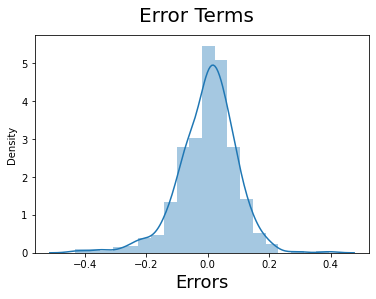

In [61]:
# Ploting the histogram of the error
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using final 7th model.

In [62]:
# Applying same scaling on test data as we did on train data.
bu_test[num_vars] = Scaler.transform(bu_test[num_vars])

In [63]:
bu_test.describe()

,year,holiday,workingday,temp,hum,windspeed,count,season_spring,season_summer,season_winter,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_light rain,weather_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [64]:
#droping count - target variable
y_test = bu_test.pop('count')
X_test = bu_test

In [65]:
# Adding constant variable to test dataframe
X_test_m7 = sm.add_constant(X_test)

In [66]:
rfe_X_train.head()

,year,holiday,temp,season_spring,season_winter,month_jul,month_sept,weather_light rain,weather_mist
653,1,0,0.509887,0,1,0,0,0,0
576,1,0,0.815169,0,0,1,0,0,0
426,1,0,0.442393,1,0,0,0,0,1
728,1,0,0.245101,1,0,0,0,0,0
482,1,0,0.395666,0,0,0,0,0,1


- Test data has all 29 columns where as we have now reduced the training data to only have 9 columns. Let's drop those extra columns from test dataset.

In [67]:
# dropping extra variables from test data set.

X_test_m7 = X_test_m7.drop(['workingday', 'hum', 'windspeed',
       'season_summer', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'], axis = 1)

In [68]:
y_pred_m7 = lr_7.predict(X_test_m7)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

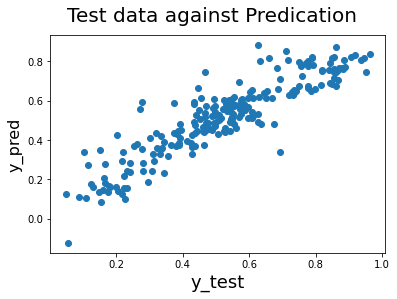

In [69]:
# Plotting y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred_m7)
fig.suptitle('Test data against Predication', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

## Step 9 - Best fitted line
equation for best fitted line is

$ count = 0.2330  \times  year - 0.1011  \times  holiday + 0.4712 \times temp - 0.1107 \times season \space spring + 0.0558 \times season \space winter - 0.0688 \times month-june + 0.0658 \times month \space sept - 0.3002 \times weather \space light \space rain - 0.0796 \times weather \space mist $



> Overall we have a good model.

In [70]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_m7)
print('R2 Score is', r2)

R2 Score is 0.8092200832884748
